In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Real_Estate.csv')
df.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [4]:
df.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

In [5]:
df.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\dines\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dines\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dines\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dines\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

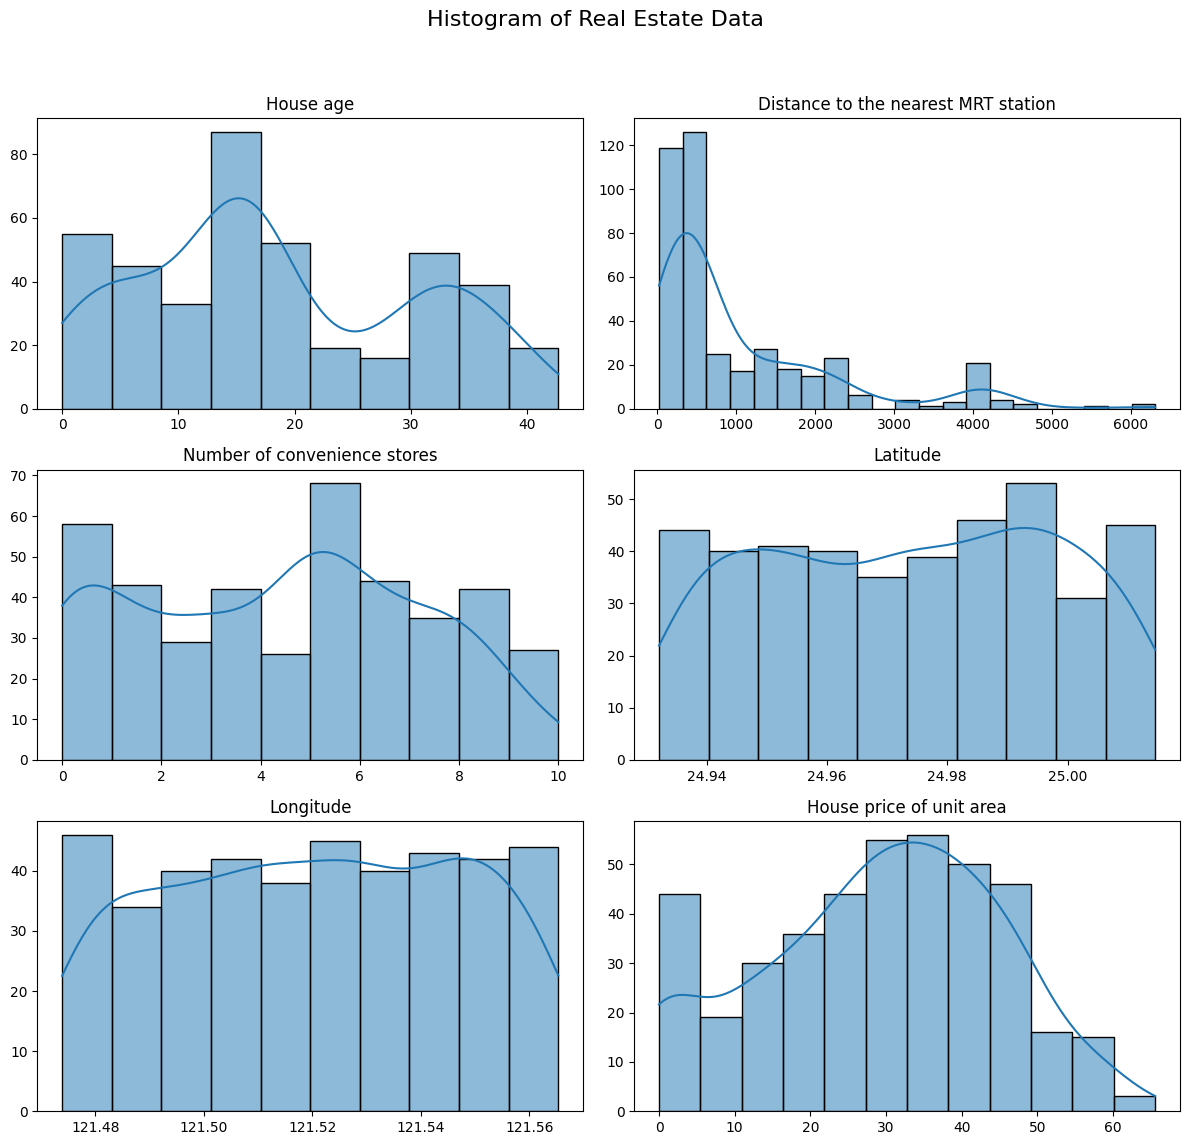

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize =(12, 12))

fig.suptitle('Histogram of Real Estate Data', fontsize = 16)

cols = ['House age', 'Distance to the nearest MRT station', 'Number of convenience stores',
        'Latitude', 'Longitude', 'House price of unit area']

for i, col in enumerate(cols):
    sns.histplot(df[col], kde=True, ax=axes[i//2, i%2])

    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

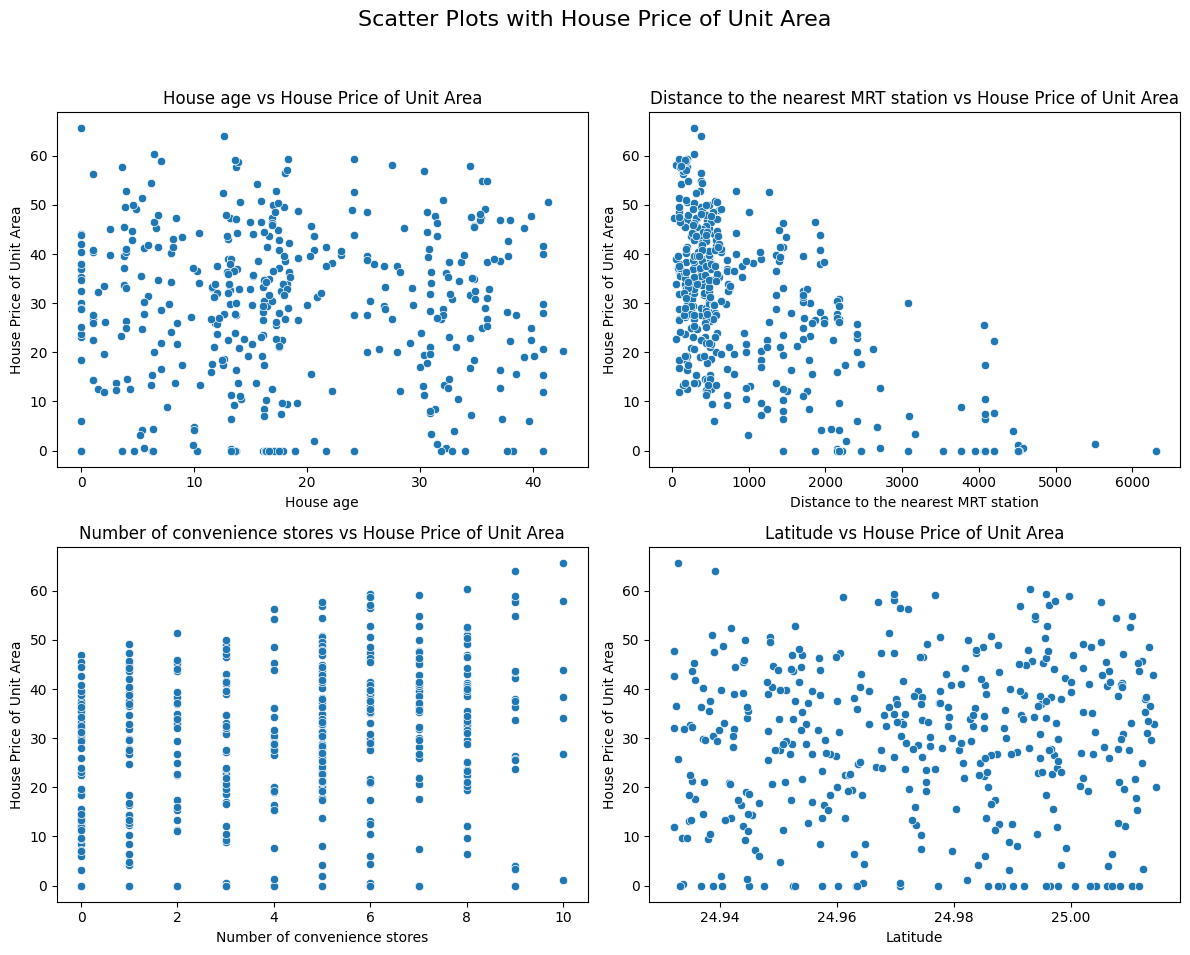

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Scatter Plots with House Price of Unit Area', fontsize=16)

cols = ['House age', 'Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude']

for i, col in enumerate(cols):
    sns.scatterplot(data = df, x=col, y = 'House price of unit area', ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'{col} vs House Price of Unit Area')
    axes[i//2, i%2].set_xlabel(col)
    axes[i//2, i%2].set_ylabel('House Price of Unit Area')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

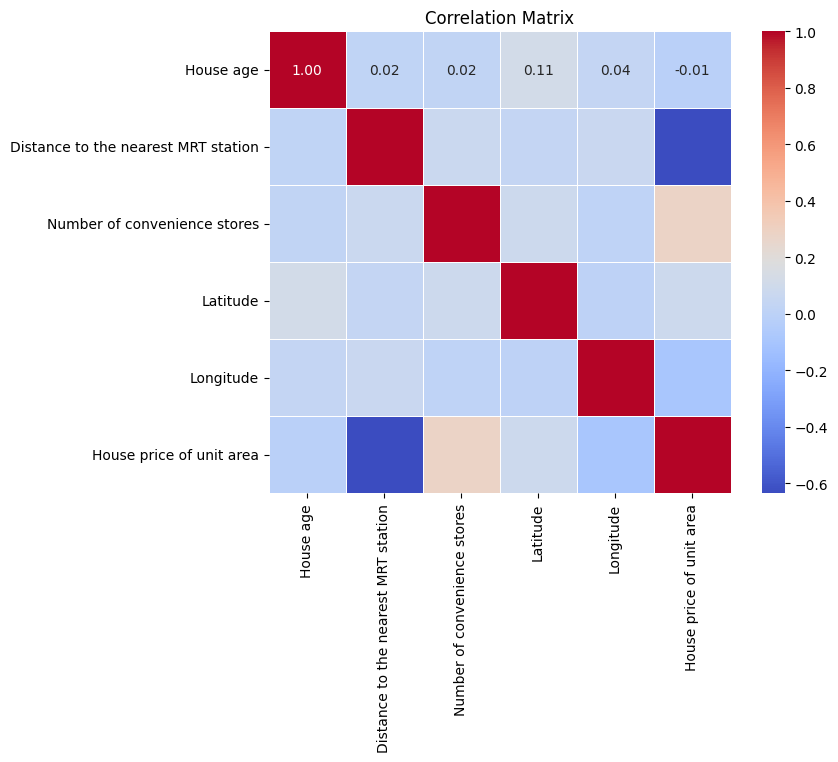

                                     House age  \
House age                             1.000000   
Distance to the nearest MRT station   0.021596   
Number of convenience stores          0.021973   
Latitude                              0.114345   
Longitude                             0.036449   
House price of unit area             -0.012284   

                                     Distance to the nearest MRT station  \
House age                                                       0.021596   
Distance to the nearest MRT station                             1.000000   
Number of convenience stores                                    0.069015   
Latitude                                                        0.038954   
Longitude                                                       0.064229   
House price of unit area                                       -0.636579   

                                     Number of convenience stores  Latitude  \
House age                            

In [22]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap="coolwarm", linewidths=0.5, annot=True, square=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

print(correlation_matrix)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [34]:
features = ['Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude']
target = 'House price of unit area'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2025)

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred_lr = model.predict(X_test)

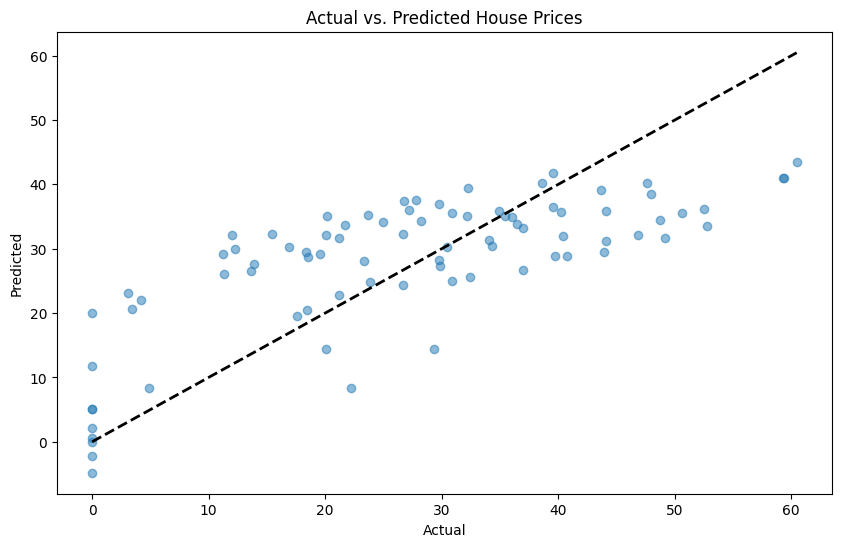

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted House Prices')
plt.show()

In [39]:
import dash
from dash import html, dcc, Input, Output, State

app = dash.Dash(__name__)
app.layout = html.Div([
    html.Div([
        html.H1("🏠 Real Estate Price Prediction", style={
            'text-align': 'center',
            'color': '#2c3e50',
            'font-family': 'Arial, sans-serif',
            'margin-bottom': '30px'
        }),

        html.Div([
            dcc.Input(id='distance_to_mrt', type='number', placeholder='Distance to MRT Station (meters)',
                      style={
                          'margin': '10px',
                          'padding': '12px',
                          'width': '80%',
                          'border-radius': '8px',
                          'border': '1px solid #ccc',
                          'font-size': '16px'
                      }),
            dcc.Input(id='num_convenience_stores', type='number', placeholder='Number of Convenience Stores',
                      style={
                          'margin': '10px',
                          'padding': '12px',
                          'width': '80%',
                          'border-radius': '8px',
                          'border': '1px solid #ccc',
                          'font-size': '16px'
                      }),
            dcc.Input(id='latitude', type='number', placeholder='Latitude',
                      style={
                          'margin': '10px',
                          'padding': '12px',
                          'width': '80%',
                          'border-radius': '8px',
                          'border': '1px solid #ccc',
                          'font-size': '16px'
                      }),
            dcc.Input(id='longitude', type='number', placeholder='Longitude',
                      style={
                          'margin': '10px',
                          'padding': '12px',
                          'width': '80%',
                          'border-radius': '8px',
                          'border': '1px solid #ccc',
                          'font-size': '16px'
                      }),
            html.Button('📈 Predict Price', id='predict_button', n_clicks=0,
                        style={
                            'margin': '20px auto',
                            'padding': '12px 24px',
                            'font-size': '16px',
                            'background-color': '#27ae60',
                            'color': 'white',
                            'border': 'none',
                            'border-radius': '8px',
                            'cursor': 'pointer',
                            'transition': '0.3s'
                        }),
        ], style={
            'text-align': 'center',
            'display': 'flex',
            'flex-direction': 'column',
            'align-items': 'center'
        }),

        html.Div(id='prediction_output', style={
            'text-align': 'center',
            'font-size': '22px',
            'margin-top': '30px',
            'color': '#34495e',
            'font-weight': 'bold'
        })
    ], style={
        'width': '50%',
        'margin': '0 auto',
        'background-color': '#f9f9f9',
        'padding': '30px',
        'border-radius': '15px',
        'box-shadow': '0 4px 8px rgba(0, 0, 0, 0.1)'
    })
])



@app.callback(
    Output('prediction_output', 'children'),
    [Input('predict_button', 'n_clicks')],
    [State('distance_to_mrt', 'value'), 
     State('num_convenience_stores', 'value'),
     State('latitude', 'value'),
     State('longitude', 'value')]
)
def update_output(n_clicks, distance_to_mrt, num_convenience_stores, latitude, longitude):
    if n_clicks > 0 and all(v is not None for v in [distance_to_mrt, num_convenience_stores, latitude, longitude]):
        features = pd.DataFrame([[distance_to_mrt, num_convenience_stores, latitude, longitude]], 
                                columns=['Distance to the nearest MRT station', 
                                         'Number of convenience stores', 
                                         'Latitude', 
                                         'Longitude'])
        prediction = model.predict(features)[0]
        return f'Predicted House Price of Unit Area: {prediction:.2f}'
    elif n_clicks > 0:
        return 'Please enter all values to get a prediction'
    return ''

# Run the app
if __name__ == '__main__':
    app.run(debug=True)